In [3]:
#import required libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time 

In [8]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = np.copy(colored_img)
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

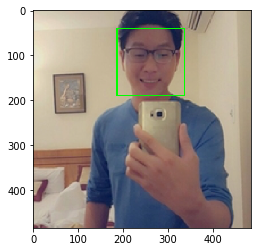

In [9]:
# Now let's try this function on another test image. 

haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

#load another image
test2 = cv2.imread('2.png')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))